In [2]:
#make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
#import google drive package
from  google.colab import drive

In [0]:
from fastai.vision import *

In [6]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [0]:
# to make balls folder 
(Path(root_path)/'Balls').mkdir(parents=True, exist_ok=True)

In [0]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Balls/'

In [0]:
#make folder names 
folders = ['golf','baseball','basketball','soccer','tennis','bowling','lacrosse','american_football','rugby','cricket','volleyball','dragon','pool','hockey','softball']

In [0]:
#create all folders in /Balls
for i in folders:
  path = Path(proj_path)
  dest = (path/i).mkdir(parents=True, exist_ok=True)

In [0]:
#save fastai path 
p_path = Path(proj_path)

In [0]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['american_football',
 'baseball',
 'basketball',
 'bowling',
 'cricket',
 'dragon',
 'golf',
 'hockey',
 'lacrosse',
 'pool',
 'rugby',
 'soccer',
 'softball',
 'tennis',
 'volleyball']

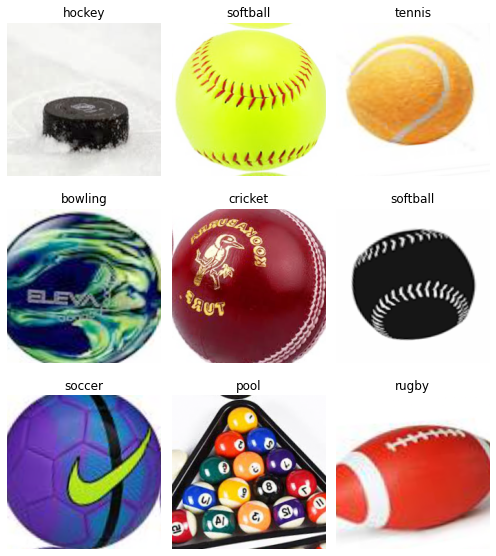

In [16]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american_football',
  'baseball',
  'basketball',
  'bowling',
  'cricket',
  'dragon',
  'golf',
  'hockey',
  'lacrosse',
  'pool',
  'rugby',
  'soccer',
  'softball',
  'tennis',
  'volleyball'],
 15,
 600,
 149)

In [18]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [19]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,3.556046,1.493705,0.449664,04:19
1,2.255796,0.314951,0.093960,03:16
2,1.487619,0.272059,0.067114,03:19
3,1.062065,0.255821,0.067114,03:17
4,0.797979,0.240717,0.073826,03:18
5,0.620571,0.243880,0.073826,03:15
6,0.494560,0.243561,0.067114,03:21
7,0.407184,0.243140,0.067114,03:18


In [20]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Balls/models/model1_34.pth')

In [0]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


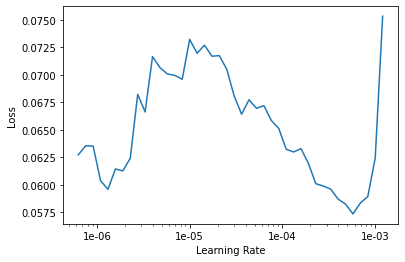

In [22]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [23]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

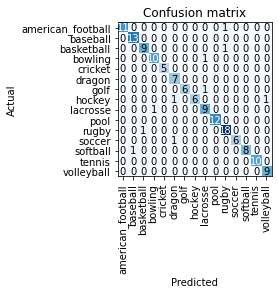

In [24]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

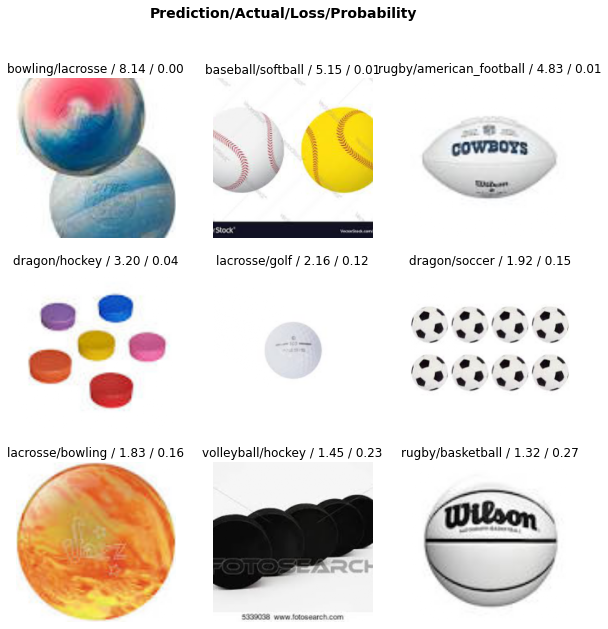

In [25]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

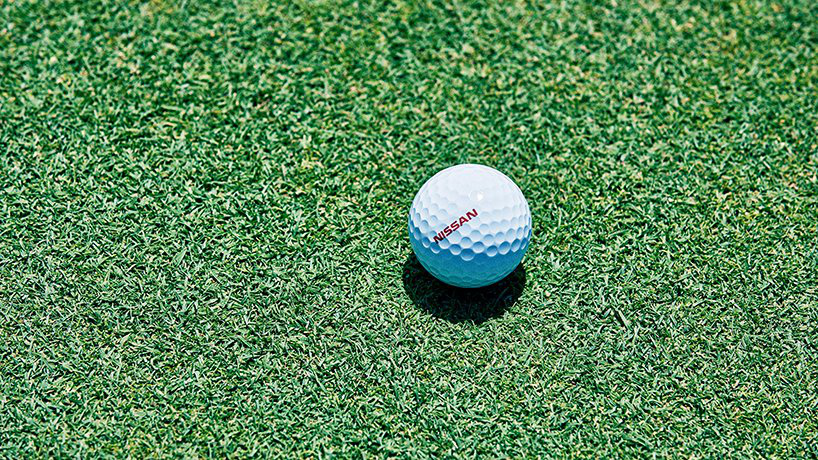

In [48]:
img_golf= open_image(Path(root_path)/'Balls'/'golf'/'check.jpg')
img_golf


In [49]:
pred_class,pred_idx,outputs = learn.predict(img_golf)
pred_class

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Category tensor(6)